# World Cup 2023 Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Loading datasets
batting_df = pd.read_csv('batting_summary.csv')
bowling_df = pd.read_csv('bowling_summary.csv')
match_df = pd.read_csv('match_schedule_results.csv')
world_df = pd.read_csv('world_cup_players_info.csv')

In [4]:
#Loading the heads of all the data
batting_df.head()

,Match_no,Match_Between,Team_Innings,Batsman_Name,Batting_Position,Dismissal,Runs,Balls,4s,6s,Strike_Rate
0,1,England vs New Zealand,England,Jonny Bairstow,1,c Daryl Mitchell b Mitchell Santner,33,35,4,1,94.300
1,1,England vs New Zealand,England,Dawid Malan,2,c Tom Latham b Matt Henry,14,24,2,0,58.300
2,1,England vs New Zealand,England,Joe Root,3,b Glenn Phillips,77,86,4,1,89.500
3,1,England vs New Zealand,England,Harry Brook,4,c Devon Conway b Rachin Ravindra,25,16,4,1,156.300
4,1,England vs New Zealand,England,Moeen Ali,5,b Glenn Phillips,11,17,1,0,64.700


In [5]:
bowling_df.head()

,Match_no,Match_Between,Bowling_Team,Bowler_Name,Overs,Maidens,Runs,Wickets,Economy
0,1,England vs New Zealand,New Zealand,Trent Boult,10.0,1,48,1,4.8
1,1,England vs New Zealand,New Zealand,Matt Henry,10.0,1,48,3,4.8
2,1,England vs New Zealand,New Zealand,Mitchell Santner,10.0,0,37,2,3.7
3,1,England vs New Zealand,New Zealand,Jimmy Neesham,7.0,0,56,0,8.0
4,1,England vs New Zealand,New Zealand,Rachin Ravindra,10.0,0,76,1,7.6


In [6]:
match_df.head()

,Match_no,Date,Venue,Team1,Team2,Winner,Scorecard URL
0,1,October 5,Ahmedabad,England,New Zealand,New Zealand,https://www.cricketwa.com/scorecard/18020/engl...
1,2,October 6,Hyderabad,Pakistan,Netherlands,Pakistan,https://www.cricketwa.com/scorecard/18021/paki...
2,3,October 7,Dharamsala,Bangladesh,Afghanistan,Bangladesh,https://www.cricketwa.com/scorecard/23008/bang...
3,4,October 7,Delhi,South Africa,Sri Lanka,South Africa,https://www.cricketwa.com/scorecard/23009/sout...
4,5,October 8,Chennai,India,Australia,India,https://www.cricketwa.com/scorecard/23010/indi...


In [7]:
world_df.head()

,player_name,team_name,image_of_player,battingStyle,bowlingStyle,playingRole,description
0,Jonny Bairstow,England,,Right-hand bat,Right-arm fast-medium,Wicketkeeper Batter,Jonny Bairstow is an English cricketer known f...
1,Joe Root,England,,Right hand Bat,Right arm Offbreak,Top order Batter,Joe Root is an English cricketer known for his...
2,Jos Buttler,England,,Right hand Bat,,Wicketkeeper Batter,Jos Buttler is an English cricketer known for ...
3,Will Young,New Zealand,,Right hand Bat,Right arm Offbreak,Top order Batter,Will Young is a New Zealand cricketer known fo...
4,Rachin Ravindra,New Zealand,,Left hand Bat,Slow Left arm Orthodox,Top order Batter,Rachin Ravindra is a New Zealand cricketer kno...


### Understanding all the columns for four datasets

In [12]:
print(batting_df.columns.tolist())

['Match_no', 'Match_Between', 'Team_Innings', 'Batsman_Name', 'Batting_Position', 'Dismissal', 'Runs', 'Balls', '4s', '6s', 'Strike_Rate']


In [13]:
print(bowling_df.columns.tolist())

['Match_no', 'Match_Between', 'Bowling_Team', 'Bowler_Name', 'Overs', 'Maidens', 'Runs', 'Wickets', 'Economy']


In [14]:
print(match_df.columns.tolist())

['Match_no', 'Date', 'Venue', 'Team1', 'Team2', 'Winner', 'Scorecard URL']


In [16]:
print(world_df.columns.tolist())

['player_name', 'team_name', 'image_of_player', 'battingStyle', 'bowlingStyle', 'playingRole', 'description']


### Checking not out in the batting data

In [25]:
batting_df['not_out'] = batting_df['Dismissal'].str.contains('not out', case=False, na=False)

### Filtering For Bowlers

In [29]:
batting_df['bowled_by'] = batting_df['Dismissal'].str.extract(r'b\s+(.*)')

### Categorizing dismissal

In [39]:
# 1. Re-run the creation logic to be sure
def categorize_dismissal(text):
    text = str(text).lower()
    if 'not out' in text: return 'not out'
    if 'c ' in text: return 'caught'
    if 'lbw' in text: return 'lbw'
    if 'bowled' in text or 'b ' in text: return 'bowled'
    if 'run out' in text: return 'run out'
    return 'other'

batting_df['dismissal_type'] = batting_df['Dismissal'].apply(categorize_dismissal)

# 2. DROP columns that are no longer needed
# We drop 'Scorecard URL' from match_df and 'description' from world_df
# as per your project plan to remove redundant data.
match_df.drop(columns=['Scorecard URL'], inplace=True, errors='ignore')
world_df.drop(columns=['image_of_player', 'description'], inplace=True, errors='ignore')

# 3. Verify they are actually there now

In [40]:
# 3. Verify they are actually there now
print("Batting Columns:", batting_df.columns.tolist())

Batting Columns: ['Match_no', 'Match_Between', 'Team_Innings', 'Batsman_Name', 'Batting_Position', 'Dismissal', 'Runs', 'Balls', '4s', '6s', 'Strike_Rate', 'not_out', 'bowled_by', 'dismissal_type']


In [41]:
batting_df.head()

,Match_no,Match_Between,Team_Innings,Batsman_Name,Batting_Position,Dismissal,Runs,Balls,4s,6s,Strike_Rate,not_out,bowled_by,dismissal_type
0,1,England vs New Zealand,England,Jonny Bairstow,1,c Daryl Mitchell b Mitchell Santner,33,35,4,1,94.300,False,Mitchell Santner,caught
1,1,England vs New Zealand,England,Dawid Malan,2,c Tom Latham b Matt Henry,14,24,2,0,58.300,False,Matt Henry,caught
2,1,England vs New Zealand,England,Joe Root,3,b Glenn Phillips,77,86,4,1,89.500,False,Glenn Phillips,bowled
3,1,England vs New Zealand,England,Harry Brook,4,c Devon Conway b Rachin Ravindra,25,16,4,1,156.300,False,Rachin Ravindra,caught
4,1,England vs New Zealand,England,Moeen Ali,5,b Glenn Phillips,11,17,1,0,64.700,False,Glenn Phillips,bowled


### Cleaning of Batting is done

### Let's Move to clean bowling

In [43]:
print("Bowling Data Types\n", bowling_df.dtypes)

Bowling Data Types
 Match_no           int64
Match_Between     object
Bowling_Team      object
Bowler_Name       object
Overs            float64
Maidens            int64
Runs               int64
Wickets            int64
Economy          float64
dtype: object


In [46]:
print("Unique values in overs\n", bowling_df['Overs'].unique()[:10])

Unique values in overs
 [10.   7.   3.   6.   5.   9.2  8.   9.   2.   6.2]


In [49]:
bowling_df['Bowler_Name'] = bowling_df['Bowler_Name'].str.replace(r'[*†()]', '', regex=True).str.strip()

### Converting Overs to Balls

In [50]:
def overs_to_balls(overs):
  overs_str = str(overs)
  if '.' in overs_str:
    parts = overs_str.split('.')
    return (int(parts[0]) * 6) + int(parts[1])
  else:
    return int(overs)*6

bowling_df['total_balls'] = bowling_df['Overs'].apply(overs_to_balls)

### Generate Economy

In [51]:
bowling_df['economy'] = (bowling_df['Runs'] / bowling_df['total_balls']) * 6

In [52]:
display(bowling_df[['Bowler_Name', 'Overs', 'total_balls', 'economy']].head())

,Bowler_Name,Overs,total_balls,economy
0,Trent Boult,10.0,60,4.8
1,Matt Henry,10.0,60,4.8
2,Mitchell Santner,10.0,60,3.7
3,Jimmy Neesham,7.0,42,8.0
4,Rachin Ravindra,10.0,60,7.6


### Bowling df completed

Let's start with Match_df

In [55]:
match_df['Date'] = pd.to_datetime(match_df['Date'] + ', 2023')

In [57]:
# standardize venue and team names
match_df['Venue'] = match_df['Venue'].str.strip()
match_df['Team1'] = match_df['Team1'].str.strip()
match_df['Team2'] = match_df['Team2'].str.strip()
match_df['Winner'] = match_df['Winner'].str.strip()

In [58]:
match_df.drop(columns=['Scorecard URL'], inplace=True, errors='ignore')

In [59]:
print("Missing Winners Count", match_df['Winner'].isna().sum())

Missing Winners Count 0


In [60]:
display(match_df.head())

,Match_no,Date,Venue,Team1,Team2,Winner
0,1,2023-10-05,Ahmedabad,England,New Zealand,New Zealand
1,2,2023-10-06,Hyderabad,Pakistan,Netherlands,Pakistan
2,3,2023-10-07,Dharamsala,Bangladesh,Afghanistan,Bangladesh
3,4,2023-10-07,Delhi,South Africa,Sri Lanka,South Africa
4,5,2023-10-08,Chennai,India,Australia,India


### Now We have to perform Merge

In [68]:
# Perform the merge
# We use 'left' so that if a player is missing from the world_df,
# we still keep their batting runs in our dataset.
batting_with_roles = pd.merge(
    batting_df,
    world_df[['player_name', 'team_name', 'battingStyle', 'playingRole']],
    left_on='Batsman_Name',
    right_on='player_name',
    how='left'
)

# After merging, we can drop the redundant 'player_name' column
# because 'Batsman_Name' already has that info.
batting_with_roles.drop(columns=['player_name'], inplace=True)

# Display the result to see your new 'Enriched' dataset
display(batting_with_roles.head())

,Match_no,Match_Between,Team_Innings,Batsman_Name,Batting_Position,Dismissal,Runs,Balls,4s,6s,Strike_Rate,not_out,bowled_by,dismissal_type,team_name,battingStyle,playingRole
0,1,England vs New Zealand,England,Jonny Bairstow,1,c Daryl Mitchell b Mitchell Santner,33,35,4,1,94.300,False,Mitchell Santner,caught,England,Right-hand bat,Wicketkeeper Batter
1,1,England vs New Zealand,England,Dawid Malan,2,c Tom Latham b Matt Henry,14,24,2,0,58.300,False,Matt Henry,caught,England,Left hand Bat,Top order Batter
2,1,England vs New Zealand,England,Joe Root,3,b Glenn Phillips,77,86,4,1,89.500,False,Glenn Phillips,bowled,England,Right hand Bat,Top order Batter
3,1,England vs New Zealand,England,Harry Brook,4,c Devon Conway b Rachin Ravindra,25,16,4,1,156.300,False,Rachin Ravindra,caught,England,Right hand Bat,Batter
4,1,England vs New Zealand,England,Moeen Ali,5,b Glenn Phillips,11,17,1,0,64.700,False,Glenn Phillips,bowled,England,Left hand Bat,Batting Allrounder


In [69]:
print("Missing roles after merge:", batting_with_roles['playingRole'].isnull().sum())

Missing roles after merge: 0


### Batting Analysis

In [70]:
# Merge the batting/roles data with the match results
# This adds Venue, Winner, and Match Date to every player's performance row
final_batting_analysis = pd.merge(
    batting_with_roles,
    match_df[['Match_no', 'Date', 'Venue', 'Winner']],
    on='Match_no',
    how='left'
)

### Understanding Bowler Roles

In [71]:
# Merge bowling data with player info
bowling_with_roles = pd.merge(
    bowling_df,
    world_df[['player_name', 'playingRole']],
    left_on='Bowler_Name',
    right_on='player_name',
    how='left'
).drop(columns=['player_name'])

### Find Index of the highest Scores

In [74]:
idx = final_batting_analysis.groupby('Match_no')['Runs'].idxmax()

### Top Scorer for Every Match

In [76]:
top_scorers_per_match = final_batting_analysis.loc[idx, ['Match_no', 'Batsman_Name', 'Runs', 'Team_Innings', 'Venue']]
top_scorers_per_match

,Match_no,Batsman_Name,Runs,Team_Innings,Venue
11,1,Devon Conway,152,New Zealand,Ahmedabad
17,2,Mohammad Rizwan,68,Pakistan,Hyderabad
50,3,Najmul Hossain Shanto,59,Bangladesh,Dharamsala
55,4,Rassie van der Dussen,108,South Africa,Delhi
86,5,KL Rahul,97,India,Chennai
89,6,Will Young,70,New Zealand,Hyderabad
109,7,Dawid Malan,140,England,Dharamsala
143,8,Mohammad Rizwan,131,Pakistan,Hyderabad
156,9,Rohit Sharma,131,India,Delhi
160,10,Quinton de Kock,109,South Africa,Ekana Cricket Stadium Lucknow


### Visualizing top 5 scorers

/tmp/ipython-input-3829211056.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_batsmen.values, y=top_batsmen.index, palette='viridis')


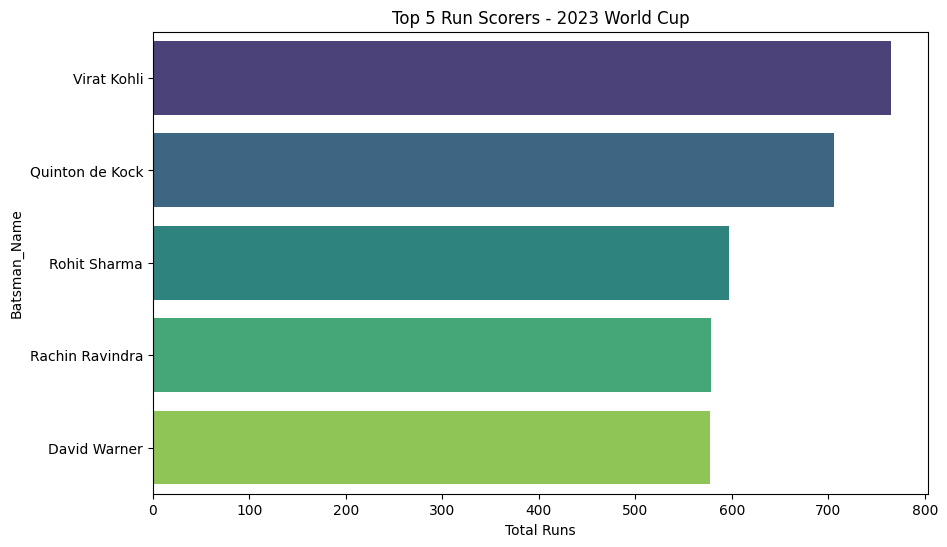

In [79]:
# Top 5 Batsmen by Total Runs
top_batsmen = batting_df.groupby('Batsman_Name')['Runs'].sum().sort_values(ascending=False).head(5)

plt.figure(figsize=(10,6))
sns.barplot(x=top_batsmen.values, y=top_batsmen.index, palette='viridis')
plt.title('Top 5 Run Scorers - 2023 World Cup')
plt.xlabel('Total Runs')
plt.show()

### Comparison of Match Victories by Win Type: India vs. Australia

In [81]:
# Logic: If the Winner is the same as Team1 (who batted first), they won by Runs.
# Otherwise, they won by Wickets.
def get_win_type(row):
    if row['Winner'] == row['Team1']:
        return 'Runs'
    else:
        return 'Wickets'

match_df['win_by'] = match_df.apply(get_win_type, axis=1)

# Now check the results for India and Australia
top_teams_wins = match_df[match_df['Winner'].isin(['India', 'Australia'])]
print(top_teams_wins[['Winner', 'win_by']].value_counts())

Winner     win_by 
India      Runs       9
Australia  Runs       7
           Wickets    2
Name: count, dtype: int64


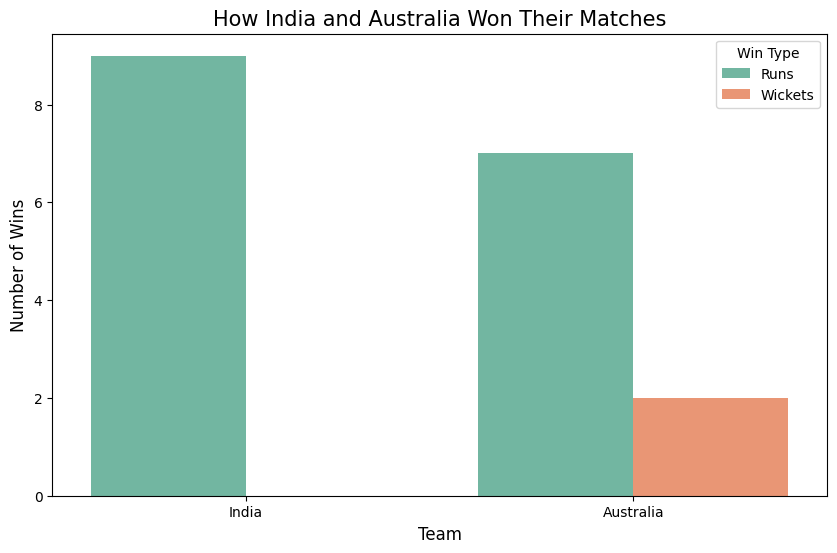

In [82]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.countplot(data=top_teams_wins, x='Winner', hue='win_by', palette='Set2')

plt.title('How India and Australia Won Their Matches', fontsize=15)
plt.xlabel('Team', fontsize=12)
plt.ylabel('Number of Wins', fontsize=12)
plt.legend(title='Win Type')
plt.show()

### Identifying Batting and Bowling Dominant Stadiums

/tmp/ipython-input-389528234.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=venue_averages, x='Runs', y='Venue', palette='YlOrRd')


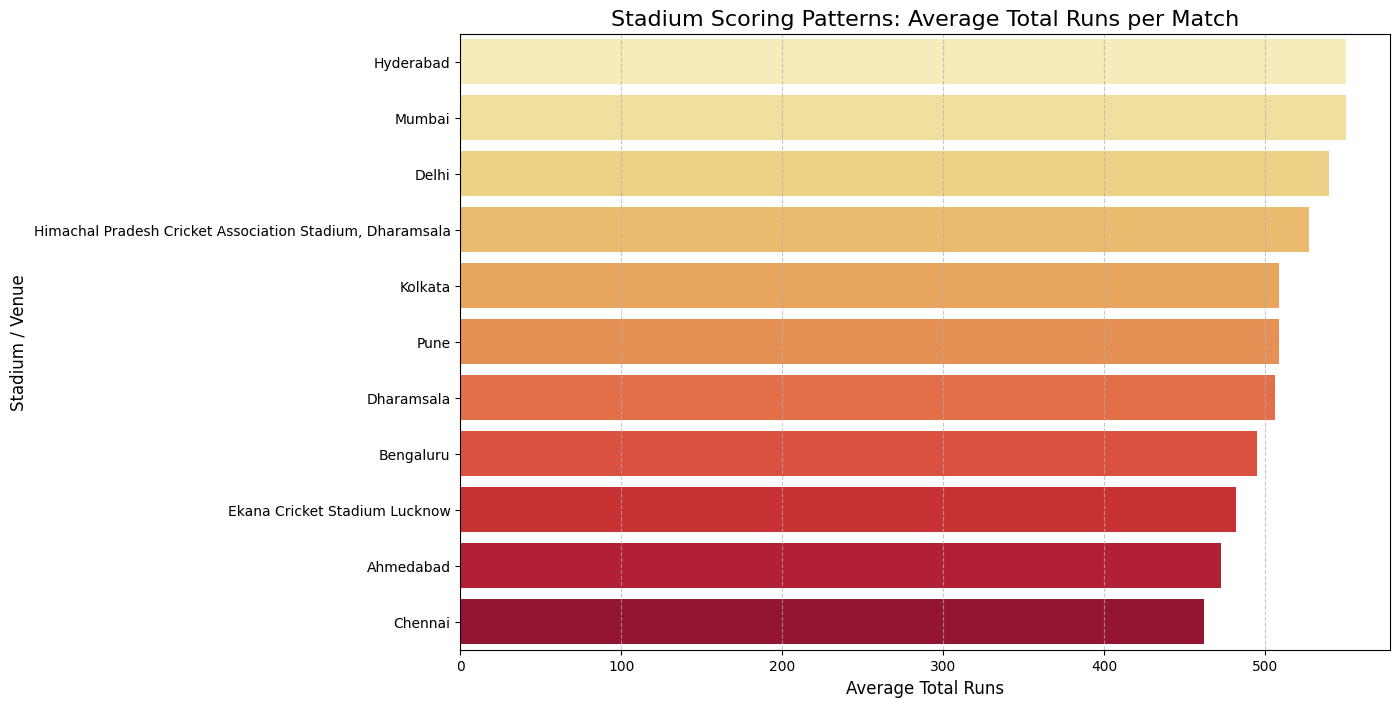

In [83]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Calculate total runs for each match at each venue
# We group by Match_no and Venue to get the sum of runs in that specific match
match_scores = final_batting_analysis.groupby(['Match_no', 'Venue'])['Runs'].sum().reset_index()

# 2. Calculate the average of those totals per venue
venue_averages = match_scores.groupby('Venue')['Runs'].mean().sort_values(ascending=False).reset_index()

# 3. Create the Visualization
plt.figure(figsize=(12, 8))
sns.barplot(data=venue_averages, x='Runs', y='Venue', palette='YlOrRd')

plt.title('Stadium Scoring Patterns: Average Total Runs per Match', fontsize=16)
plt.xlabel('Average Total Runs', fontsize=12)
plt.ylabel('Stadium / Venue', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

In [88]:
# Create a dictionary for Match_no and the Player of the Match
# (You will need to fill this with all 48 match winners for a complete chart)
mom_data = {
    1: 'Rachin Ravindra',
    12: 'Jasprit Bumrah',
    21: 'Mohammed Shami',
    24: 'Glenn Maxwell',
    39: 'Glenn Maxwell',
    48: 'Travis Head'
    # ... add other match numbers and names here
}

# Map the names to your match_df based on Match_no
match_df['player_of_match'] = match_df['Match_no'].map(mom_data)

# Verify the new column
print(match_df[['Match_no', 'Winner', 'player_of_match']].head())

   Match_no        Winner  player_of_match
0         1   New Zealand  Rachin Ravindra
1         2      Pakistan              NaN
2         3    Bangladesh              NaN
3         4  South Africa              NaN
4         5         India              NaN


In [87]:
# List all column names to find the right one
print(match_df.columns.tolist())

['Match_no', 'Date', 'Venue', 'Team1', 'Team2', 'Winner', 'win_by']


In [90]:
mom_data = {
    1: 'Rachin Ravindra', 2: 'Saud Shakeel', 3: 'Mehidy Hasan Miraz', 4: 'Aiden Markram',
    5: 'Ravindra Jadeja', 6: 'Mitchell Santner', 7: 'Joe Root', 8: 'Mohammad Rizwan',
    9: 'Rohit Sharma', 10: 'Quinton de Kock', 11: 'Lockie Ferguson', 12: 'Jasprit Bumrah',
    13: 'Mujeeb Ur Rahman', 14: 'Adam Zampa', 15: 'Scott Edwards', 16: 'Devon Conway',
    17: 'Virat Kohli', 18: 'David Warner', 19: 'Ibrahim Zadran', 20: 'Heinrich Klaasen',
    21: 'Mohammed Shami', 22: 'Babar Azam', 23: 'Quinton de Kock', 24: 'Glenn Maxwell',
    25: 'Lahiru Kumara', 26: 'Tabraiz Shamsi', 27: 'James Neesham', 28: 'Travis Head',
    29: 'Rohit Sharma', 30: 'Fazalhaq Farooqi', 31: 'Fakhar Zaman', 32: 'Quinton de Kock',
    33: 'Mohammed Shami', 34: 'Pat Cummins', 35: 'Fakhar Zaman', 36: 'Adam Zampa',
    37: 'Virat Kohli', 38: 'Angelo Mathews', 39: 'Glenn Maxwell', 40: 'Ben Stokes',
    41: 'Trent Boult', 42: 'Rassie van der Dussen', 43: 'Mitchell Marsh', 44: 'Ravindra Jadeja',
    45: 'Shreyas Iyer', 46: 'Mohammed Shami', 47: 'Travis Head', 48: 'Travis Head'
}
match_df['player_of_match'] = match_df['Match_no'].map(mom_data)

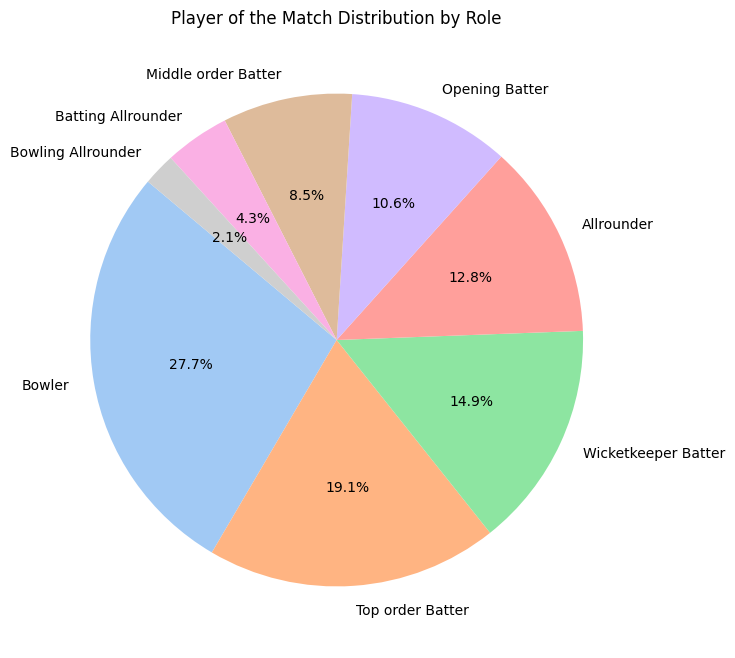

In [91]:
# Join the winners with their roles
mom_analysis = pd.merge(match_df[['player_of_match']], world_df[['player_name', 'playingRole']],
                        left_on='player_of_match', right_on='player_name', how='left')

# Create the visual
role_counts = mom_analysis['playingRole'].value_counts()
plt.figure(figsize=(8,8))
plt.pie(role_counts, labels=role_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
plt.title('Player of the Match Distribution by Role')
plt.show()

### New Section

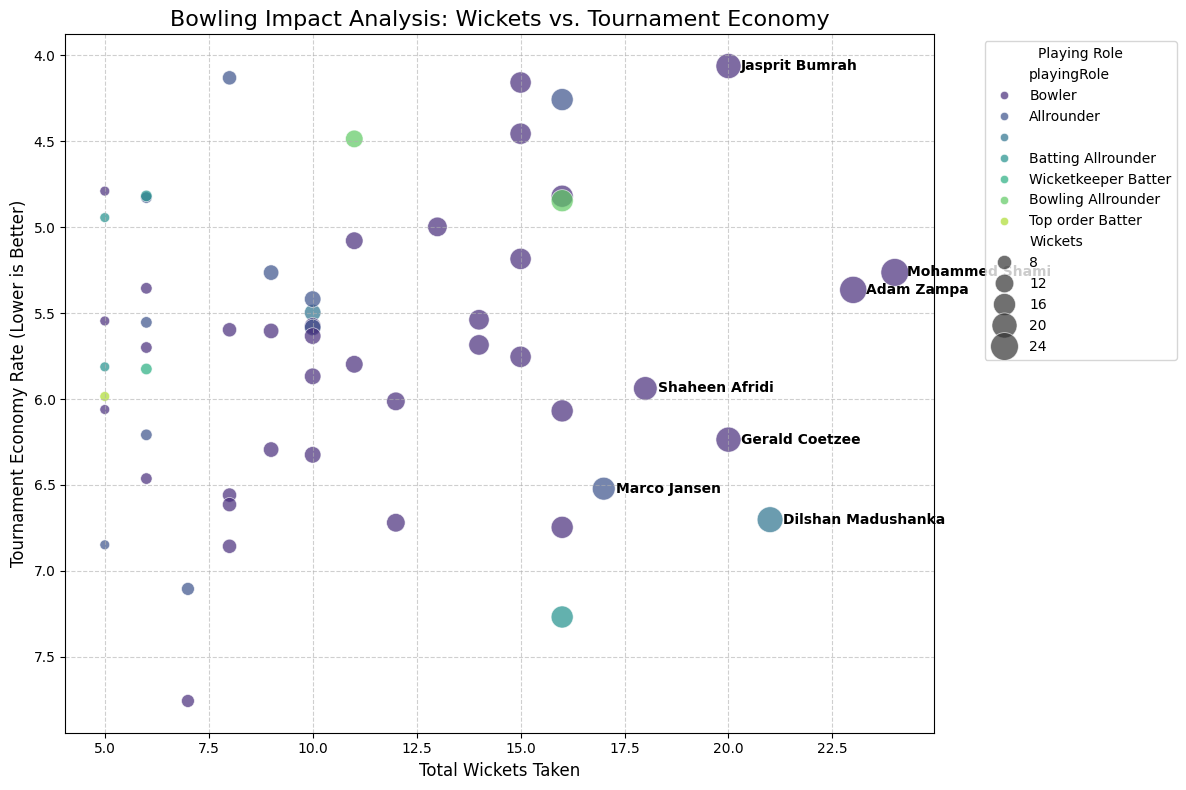

In [92]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Aggregate bowling data to get tournament totals
# We need the sum of runs and balls to calculate a true tournament economy
bowling_stats = bowling_with_roles.groupby(['Bowler_Name', 'playingRole']).agg({
    'Wickets': 'sum',
    'Runs': 'sum',
    'total_balls': 'sum'
}).reset_index()

# 2. Calculate Tournament-wide Economy
bowling_stats['Economy_Tournament'] = (bowling_stats['Runs'] / bowling_stats['total_balls']) * 6

# 3. Filter for bowlers with at least 5 wickets to keep the plot readable
top_bowlers = bowling_stats[bowling_stats['Wickets'] >= 5]

# 4. Create the Scatter Plot
plt.figure(figsize=(12, 8))
sns.scatterplot(
    data=top_bowlers,
    x='Wickets',
    y='Economy_Tournament',
    hue='playingRole',
    size='Wickets',
    sizes=(50, 400),
    alpha=0.7,
    palette='viridis'
)

# 5. Annotate Top Performers (Shami, Zampa, etc.)
# We add names to the dots with the most wickets
for i, row in top_bowlers.sort_values('Wickets', ascending=False).head(7).iterrows():
    plt.text(row['Wickets'] + 0.3, row['Economy_Tournament'], row['Bowler_Name'],
             fontsize=10, weight='semibold', va='center')

plt.title('Bowling Impact Analysis: Wickets vs. Tournament Economy', fontsize=16)
plt.xlabel('Total Wickets Taken', fontsize=12)
plt.ylabel('Tournament Economy Rate (Lower is Better)', fontsize=12)

# Invert Y-axis so 'Better' (lower economy) bowlers are at the top
plt.gca().invert_yaxis()
plt.legend(title='Playing Role', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()